# Jacobi und Gauss-Seidel - Verfahren

## Anwendung Jacobi Verfahren

In [1]:
from ngsolve import *
from netgen.geom2d import unit_square
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve_triangular
from myst_nb import glue

In [2]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.1))

In [3]:
fes = H1(mesh, order=1)
u,v = fes.TnT()
a = BilinearForm(grad(u)*grad(v)*dx+10*u*v*dx).Assemble()
f = LinearForm(1*v*dx).Assemble()
gfu = GridFunction(fes)

In [4]:
rows,cols,vals = a.mat.COO()
A = sp.csr_matrix((vals,(rows,cols)))

In [5]:
alpha = 1
d = A.diagonal()

In [6]:
r = f.vec.CreateVector()
gfu.vec[:] = 0
err0 = Norm(f.vec)
its = 0
errs = []
while True:
    r.data = f.vec - a.mat * gfu.vec
    err = Norm(r)
    errs.append(err)
    #print ("iteration", its, "res=", err)
    r.FV()[:] /= d
    gfu.vec.data += alpha * r
    if err < 1e-8 * err0 or its > 10000: break
    its = its+1
print ("needed", its, "iterations")

needed 761 iterations


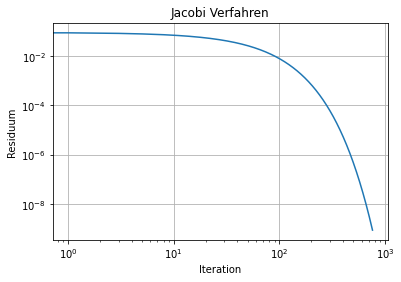

In [7]:
fig, ax = plt.subplots()
ax.loglog(errs)
ax.grid()
ax.set_title('Jacobi Verfahren: '+str(its)+' iterationen')
ax.set_xlabel('Iteration')
ax.set_ylabel('Residuum')
glue("FEM_JacobiVerfahren_fig", fig, display=False)

## Anwendung Gauss-Seidel Verfahren

In [8]:
rows,cols,vals = a.mat.COO()
A = sp.csr_matrix((vals,(rows,cols)))

In [9]:
alpha=1
D = sp.diags(A.diagonal())
L = sp.tril(A,k=-1)
R = sp.triu(A,k=1)
C = D+alpha*L

In [10]:
r = f.vec.CreateVector()
gfu.vec[:] = 0
err0 = Norm(f.vec)
its = 0
errs = []
while True:
    r.data = f.vec - a.mat * gfu.vec
    err = Norm(r)
    errs.append(err)
    #print ("iteration", its, "res=", err)
    r.FV()[:] = spsolve_triangular(C, r.FV())
    gfu.vec.data += alpha * r
    if err < 1e-8 * err0 or its > 10000: break
    its = its+1
print ("needed", its, "iterations")

needed 382 iterations


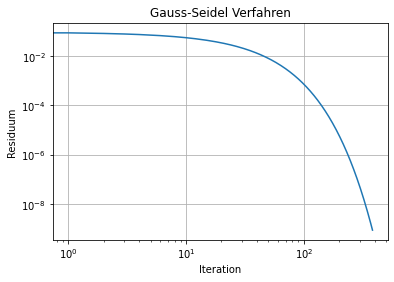

In [11]:
fig, ax = plt.subplots()
ax.loglog(errs)
ax.grid()
ax.set_title('Gauss-Seidel Verfahren: '+str(its)+' iterationen')
ax.set_xlabel('Iteration')
ax.set_ylabel('Residuum')
glue("FEM_Gauss-SeidelVerfahren_fig", fig, display=False)